In [27]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import h5py

In [28]:
# paste the path of the raw file.
workfile='/Users/cad/Downloads/rawTest/old'


pixelsPerLine=696
lineCount=520

In [29]:
# if galvos or camera conversion is simple:
rd=np.fromfile(workfile, dtype='uint16')

# some info used to make images from the vector
pixelCount=pixelsPerLine*lineCount
potentialFrames=int(rd.size/pixelCount)

In [30]:
# There are some extra bits ... but they tell me this is ok.
print(rd.size)
print(rd.size/pixelCount)  #<-- This should be an iteger, but always ~ frame more.

96468992
266.54783377542


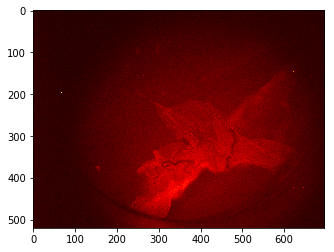

In [31]:
# Lets look at the first frame.
ff=plt.imshow(np.reshape(rd[0:(pixelsPerLine*lineCount)],(lineCount,pixelsPerLine)),cmap=plt.cm.hot)

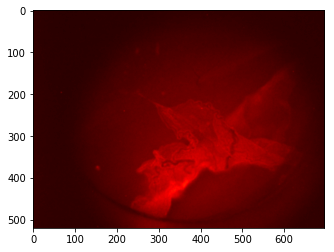

In [32]:
# Here you can dial a frame in to check.
n=265
cIm=np.reshape(rd[0+(pixelCount*(n)):(pixelsPerLine*lineCount)+(pixelCount*(n))],(lineCount,pixelsPerLine))
gg=plt.imshow(cIm,interpolation='bicubic',cmap=plt.cm.hot)

In [33]:
# now make an image browser function (ipywidgets) and we can scrub.
def browse_images():
    n = potentialFrames
    def view_image(ind):
        Y=cIm=np.reshape(rd[0+(pixelCount*(ind)):(pixelsPerLine*lineCount)+(pixelCount*(ind))],\
                         (lineCount,pixelsPerLine))
        plt.imshow(Y, cmap=plt.cm.jet,interpolation='bicubic',vmin=0,vmax=600)
        plt.xticks([])
        plt.yticks([])
        plt.show()
    interact(view_image, ind=(0,n-1))

In [34]:
browse_images()

A Jupyter Widget

In [35]:
# Now let's put this data into an hdf container.

# a) Open a file to write to.
f = h5py.File("stackData2.hdf5", "w")

In [36]:
# b) Make a 'dataset' that is this stack's ID. Let's say "camera1"
dset = f.create_dataset("camera1", (lineCount,pixelsPerLine,potentialFrames), dtype='uint16')

In [37]:
# c) We will write into the dataset by slicing. Good to know the details we are working with ...
# Let's look at the first image '0'
n=0
# The image is a vector we read off the binary, we center on the pixels that comprise our frame and reshape
# into the dimensions of the image.
cImage=np.reshape(rd[0+(pixelCount*(n)):(pixelsPerLine*lineCount)+(pixelCount*(n))],(lineCount,pixelsPerLine))

# You end up with a numpy array that has a shape of lines X pixels per line
print(type(cImage))
print(cImage.shape)

<class 'numpy.ndarray'>
(520, 696)


In [38]:
# what is the shape of our dataset?
print(dset.shape)

(520, 696, 266)


In [39]:
# The shape of the dset (above) should be the same as a frame, but with a third variable that is N frames.
# Now lets write into the data set.

dset[0:lineCount,0:pixelsPerLine,0]=cImage

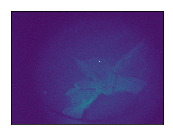

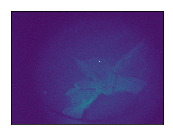

In [40]:
# Did it work? cimage should look like that chunk of the HDF
plt.subplot(1,2,1)
hh=plt.imshow(dset[:,:,0])
plt.xticks([])
plt.yticks([])
plt.show()

plt.subplot(1,2,2)
hh=plt.imshow(cImage)
plt.xticks([])
plt.yticks([])
plt.show()


In [41]:
# Ok now let's actually write all the frames.
for n in range(0,potentialFrames):

    stInd=0+(pixelCount*(n))
    endInd=(pixelsPerLine*lineCount)+(pixelCount*(n))
    cImage=np.reshape(rd[stInd:endInd],(lineCount,pixelsPerLine))
    dset[:,:,n]=cImage


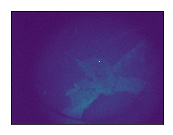

In [42]:
# Did it work? cimage should look like that chunk of the HDF
plt.subplot(1,2,1)
hh=plt.imshow(dset[:,:,10])
plt.xticks([])
plt.yticks([])
plt.show()

In [44]:
f.close()